## Short Term Memory Management

In [6]:
%pip install -qU langchain-openai

Note: you may need to restart the kernel to use updated packages.


In [7]:
%load_ext dotenv
%dotenv

### Dummy Messages

In [8]:
from langchain_core.messages import AIMessage, HumanMessage

In [9]:
messages = [
    AIMessage(content="What would you like to know about capital cities ?", name="LLM"),
    HumanMessage(content="The capital city of India is Delhi. What of France ?", name="Human"),
    AIMessage(content="The capital city of France is Paris. Would you like to know more about its history ?", name="LLM"),
    HumanMessage(content="Yes, tell me about its history.", name="Human"),
    AIMessage(content="Paris has been France's capital since 508 CE. It began as a Roman city called Lutetia, evolved through medieval times as a major cultural center, and played crucial roles in events like the French Revolution. The city has historically been a global hub for art, fashion, cuisine, and architecture, symbolized by landmarks like the Eiffel Tower.", name="LLM"),
    HumanMessage(content="Yes, tell me more about Eiffel Tower", name="Human"),
]

for message in messages:
    message.pretty_print()

================================== Ai Message ==================================
Name: LLM

What would you like to know about capital cities ?
================================ Human Message =================================
Name: Human

The capital city of India is Delhi. What of France ?
================================== Ai Message ==================================
Name: LLM

The capital city of France is Paris. Would you like to know more about its history ?
================================ Human Message =================================
Name: Human

Yes, tell me about its history.
================================== Ai Message ==================================
Name: LLM

Paris has been France's capital since 508 CE. It began as a Roman city called Lutetia, evolved through medieval times as a major cultural center, and played crucial roles in events like the French Revolution. The city has historically been a global hub for art, fashion, cuisine, and architecture, symbolized by lan

### Chat Model

In [10]:
from langchain_openai import ChatOpenAI

In [11]:
llm = ChatOpenAI(
    temperature=0.0,
    model="gpt-4o-mini",
)

In [12]:
ai_response = llm.invoke(messages)
ai_response.content


'The Eiffel Tower, known as "La Tour Eiffel" in French, is one of the most iconic landmarks in the world. Here are some key points about its history and significance:\n\n1. **Construction**: The Eiffel Tower was designed by the engineer Gustave Eiffel and his company for the 1889 Exposition Universelle (World\'s Fair) held in Paris to celebrate the 100th anniversary of the French Revolution. Construction began in January 1887 and was completed in March 1889.\n\n2. **Design**: The tower is made of iron and stands approximately 300 meters (1,083 feet) tall, making it the tallest structure in the world at the time of its completion. It was initially criticized by some of Paris\'s leading artists and intellectuals for its design, but it has since become a beloved symbol of the city.\n\n3. **Structure**: The Eiffel Tower consists of three levels accessible to the public. The first two levels feature restaurants and shops, while the third level offers an observation deck with stunning views 

### Graph Node

In [13]:
from langgraph.graph import MessagesState, START, END, StateGraph

In [14]:
def chat_model_node(state: MessagesState):
    response = llm.invoke(state["messages"])
    return {"messages": response}

In [15]:
builder = StateGraph(MessagesState)

builder.add_node("chat_model_node", chat_model_node)
builder.add_edge(START, "chat_model_node")
builder.add_edge("chat_model_node", END)

graph = builder.compile()

In [16]:
from IPython.display import display, Image

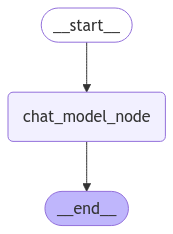

In [17]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
graph_response = graph.invoke({"messages": messages})

In [19]:
for message in graph_response["messages"]:
    message.pretty_print()

================================== Ai Message ==================================
Name: LLM

What would you like to know about capital cities ?
================================ Human Message =================================
Name: Human

The capital city of India is Delhi. What of France ?
================================== Ai Message ==================================
Name: LLM

The capital city of France is Paris. Would you like to know more about its history ?
================================ Human Message =================================
Name: Human

Yes, tell me about its history.
================================== Ai Message ==================================
Name: LLM

Paris has been France's capital since 508 CE. It began as a Roman city called Lutetia, evolved through medieval times as a major cultural center, and played crucial roles in events like the French Revolution. The city has historically been a global hub for art, fashion, cuisine, and architecture, symbolized by lan

### Filtering Technique

In [20]:
from langchain_core.messages import RemoveMessage

In [22]:
def filter_messages(state: MessagesState):
    messages = state["messages"]
    messages = [RemoveMessage(message.id) for message in messages[:-3]]
    return {"messages": messages}

### Graph

In [23]:
builder = StateGraph(MessagesState)

builder.add_node("filter_message_node", filter_messages)
builder.add_node("chat_model_node", chat_model_node)

builder.add_edge(START, "filter_message_node")
builder.add_edge("filter_message_node", "chat_model_node")
builder.add_edge("chat_model_node", END)

graph = builder.compile()

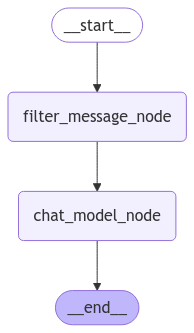

In [24]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))